# WeatherPy
----


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [169]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [156]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities[1])


assiniboia


In [157]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=84234fff1c3a20a31f245328cdff131e&units=imperial


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadhoo
Processing Record 24 of Set 1 | khatanga
Processing Record 25 of Set 1 | saint-philippe
Processing Record 26 of Set 1 | rikitea
Processing Record 27 of Set 1 | ust-kamchatsk
City not found. Skipping...

In [97]:
city_name = []
lats = []
lngs = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
dates = []
record = 1



for city in cities:
    
    try:    
        response = requests.get(f'{query_url}&q={city}').json()
        city_name.append(response["name"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        city_record = (response['name'])
        print(f'Processing Record:{record} : {city_record}')
        record += 1
    except:
        print("City not found. Skipping...")
    continue

irai
Processing Record:20 : Grand-Lahou
Processing Record:21 : Saint Paul Harbor
City not found. Skipping...
Processing Record:22 : Barrow
Processing Record:23 : Pevek
Processing Record:24 : Diamantino
Processing Record:25 : Itupiranga
Processing Record:26 : Norman Wells
Processing Record:27 : New Norfolk
Processing Record:28 : Punta Arenas
Processing Record:29 : Provideniya
Processing Record:30 : Carnarvon
Processing Record:31 : Varkaus
Processing Record:32 : Walvis Bay
Processing Record:33 : Kaeo
Processing Record:34 : Kruisfontein
Processing Record:35 : Hermanus
Processing Record:36 : Souillac
Processing Record:37 : Puerto Ayora
Processing Record:38 : Rikitea
Processing Record:39 : Dunedin
Processing Record:40 : Mana
Processing Record:41 : Ligayan
Processing Record:42 : Jumla
Processing Record:43 : Saint-Philippe
Processing Record:44 : Udachny
City not found. Skipping...
Processing Record:45 : Cape Town
Processing Record:46 : Chokurdakh
Processing Record:47 : George Town
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
#Create DataFrame
weather_dict = {
    "City" : city_name, 
    "Country" : country, 
    "Lat" : lats,
    "Lng" : lngs,
    "Max Temp" : max_temp,
    "Humidity" : humidity, 
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed,
    "Date": dates, 
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head(None)

ValueError: arrays must all be same length

In [160]:
#Save Data to CSV
weather_data.to_csv('../output_data/WeatherData.csv')
weather_data = pd.read_csv('../output_data/WeatherData.csv')


,Unnamed: 0,Unnamed: 0.1,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,0,Thung Song,TH,8.1645,99.6804,75.31,96,99,3.24,1619210085
1,1,1,Bethel,US,41.3712,-73.4140,61.00,21,1,17.27,1619210085
2,2,2,Mataura,NZ,-46.1927,168.8643,45.00,96,53,1.01,1619210086
3,3,3,Ushuaia,AR,-54.8000,-68.3000,42.80,87,75,2.30,1619209888
4,4,4,Kapaa,US,22.0752,-159.3190,80.60,61,40,14.97,1619210086


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [161]:
#Only show cities with Humidity less than or equal to 100%
nohumid_data = weather_data[weather_data['Humidity'] <= 100]
difference = len(weather_data) - len(nohumid_data)
print(f'There are {difference} cities with Humidity > 100%')
nohumid_data.head(None)

There are 0 cities with Humidity > 100%


,Unnamed: 0,Unnamed: 0.1,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,0,Thung Song,TH,8.1645,99.6804,75.31,96,99,3.24,1619210085
1,1,1,Bethel,US,41.3712,-73.4140,61.00,21,1,17.27,1619210085
2,2,2,Mataura,NZ,-46.1927,168.8643,45.00,96,53,1.01,1619210086
3,3,3,Ushuaia,AR,-54.8000,-68.3000,42.80,87,75,2.30,1619209888
4,4,4,Kapaa,US,22.0752,-159.3190,80.60,61,40,14.97,1619210086
...,...,...,...,...,...,...,...,...,...,...,...
563,563,563,Basoko,CD,1.2391,23.6160,72.68,95,97,2.42,1619210312
564,564,564,Sinazongwe,ZM,-17.2614,27.4618,71.20,55,1,3.20,1619210313
565,565,565,Harper,LR,4.3750,-7.7169,81.66,80,99,9.08,1619210313
566,566,566,Sayyan,YE,15.1718,44.3244,60.13,29,5,3.24,1619210314


In [162]:
#Longer alternative method to filtering data. 
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_data[weather_data['Humidity'] >= 100]
print(f'There are {len(humid_cities)} cities with Humidity >= 100%')
humid_cities.head(None)
humidlist = humid_cities.index.tolist()
humidlist

There are 12 cities with Humidity >= 100%


[54, 56, 88, 126, 225, 247, 253, 283, 338, 395, 509, 535]

In [102]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = weather_data.drop(humidlist)
clean_city_data.head(None)
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Thung Song,TH,8.1645,99.6804,75.31,96,99,3.24,1619210085
1,Bethel,US,41.3712,-73.4140,61.00,21,1,17.27,1619210085
2,Mataura,NZ,-46.1927,168.8643,45.00,96,53,1.01,1619210086
3,Ushuaia,AR,-54.8000,-68.3000,42.80,87,75,2.30,1619209888
4,Kapaa,US,22.0752,-159.3190,80.60,61,40,14.97,1619210086
...,...,...,...,...,...,...,...,...,...
563,Basoko,CD,1.2391,23.6160,72.68,95,97,2.42,1619210312
564,Sinazongwe,ZM,-17.2614,27.4618,71.20,55,1,3.20,1619210313
565,Harper,LR,4.3750,-7.7169,81.66,80,99,9.08,1619210313
566,Sayyan,YE,15.1718,44.3244,60.13,29,5,3.24,1619210314


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

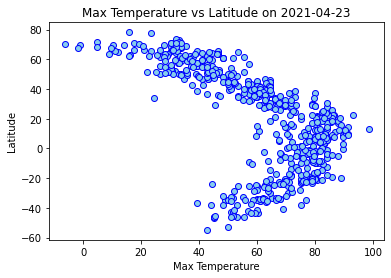

In [163]:
#Changed latitude to Y axis to better represent latitude in relation to the equator
from datetime import date
today = date.today()
plt.scatter(weather_data["Max Temp"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Max Temperature vs Latitude on {today}")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig("../output_data/latitude_vs_max_temp.png")
plt.show()


## Latitude vs. Humidity Plot

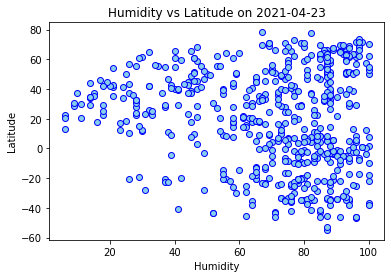

In [164]:
plt.scatter(weather_data["Humidity"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Humidity vs Latitude on {today}")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig("../output_data/latitude_vs_humid.png")
plt.show()


## Latitude vs. Cloudiness Plot

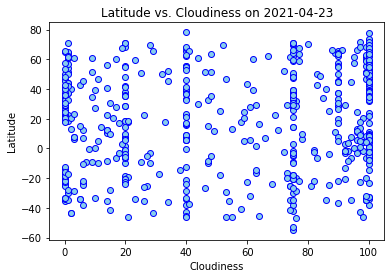

In [165]:
plt.scatter(weather_data["Cloudiness"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Latitude vs. Cloudiness on {today}")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

plt.savefig("../output_data/latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

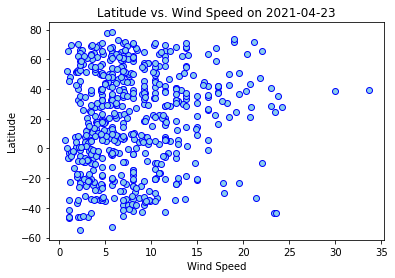

In [166]:
plt.scatter(weather_data["Wind Speed"], [weather_data['Lat']], edgecolors="b", facecolors="skyblue")
plt.title(f"Latitude vs. Wind Speed on {today}")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

plt.savefig("../output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

## Linear Regression

In [170]:
north_df = weather_data[weather_data['Lat'] >= 0]
south_df = weather_data[weather_data['Lat'] < 0]
# Perform a linear regression on temperature vs. latitude
regress_values = x_values * slope + intercept


NameError: name 'slope' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

TypeError: can only concatenate str (not "float") to str

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression